** Importing Libraries **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset = pd.read_csv("traindata.csv")

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


** Exploratory Data Analysis**

In [3]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
dataset.shape

(1017209, 9)

In [5]:
dataset.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [6]:
dataset.StateHoliday = dataset.StateHoliday.astype(str)

In [7]:
def count_unique(column):
    return len(column.unique())

dataset.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int32

In [8]:
dataset.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

** Visualization **

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


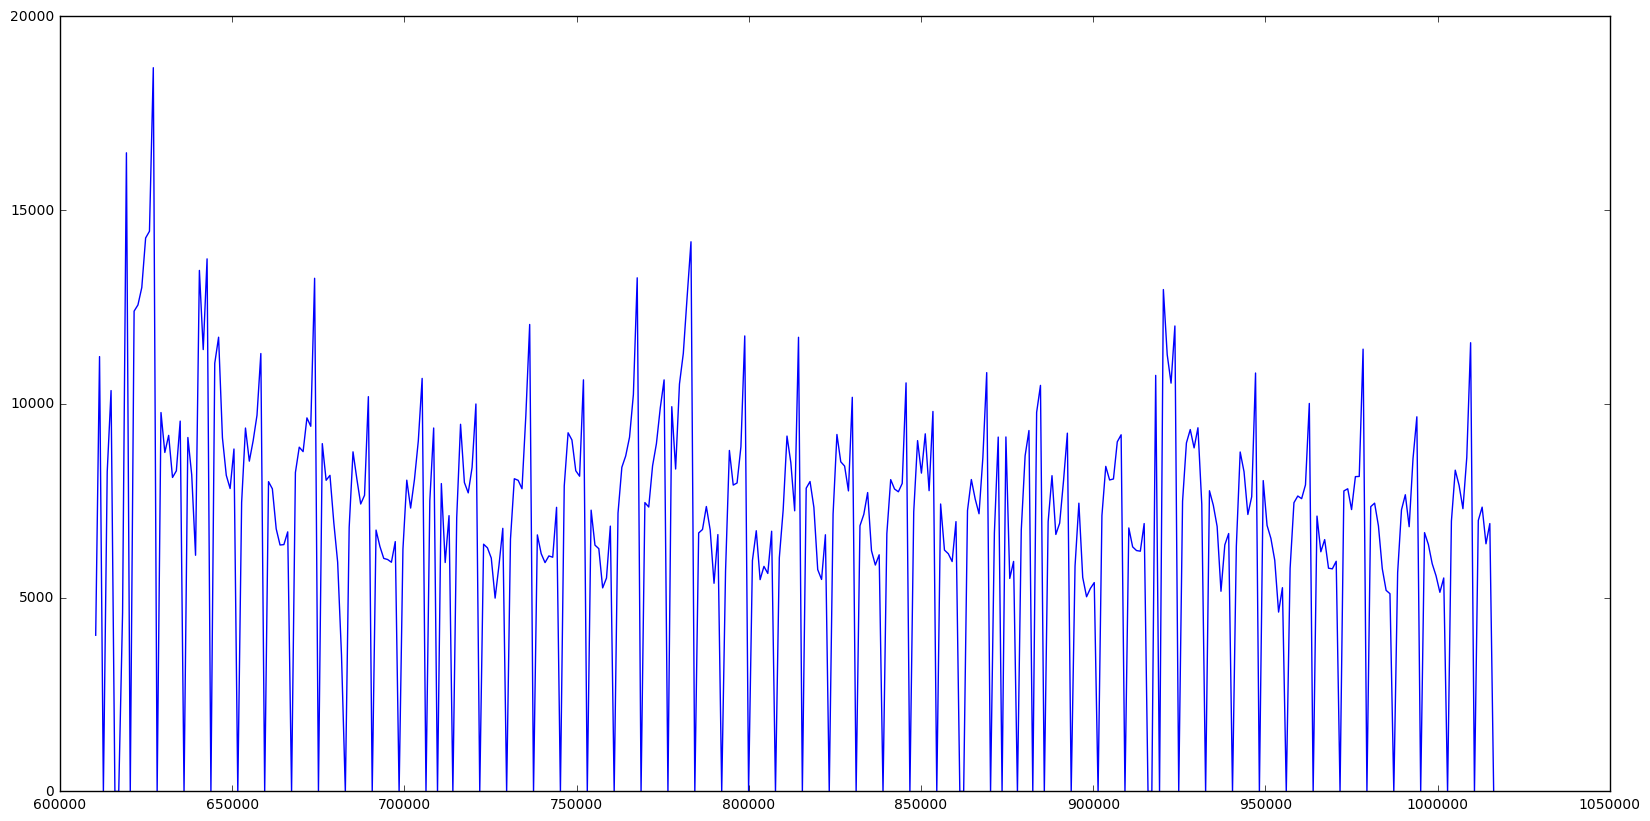

In [9]:
store_data = dataset[dataset.Store==150].sort('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[:365])

# Predective model & Pre processing

In [10]:
transformed_data = dataset.drop(['Store', 'Date', 'Customers'], axis=1)

In [11]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [12]:
transformed_data.shape

(1017209, 15)

In [13]:
transformed_data.describe()

,Sales,Open,Promo,SchoolHoliday,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.773819e+03,8.301067e-01,3.815145e-01,1.786467e-01,1.422815e-01,1.431997e-01,1.432007e-01,1.433776e-01,1.433776e-01,1.422815e-01,1.422815e-01,9.694753e-01,1.991724e-02,6.576820e-03,4.030637e-03
std,3.849926e+03,3.755392e-01,4.857586e-01,3.830564e-01,3.493388e-01,3.502765e-01,3.502775e-01,3.504577e-01,3.504577e-01,3.493388e-01,3.493388e-01,1.720261e-01,1.397160e-01,8.083051e-02,6.335925e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.727000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.744000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.856000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.155100e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
transformed_data.iloc[4]

Sales             4822.0
Open                 1.0
Promo                1.0
SchoolHoliday        1.0
DayOfWeek_1          0.0
DayOfWeek_2          0.0
DayOfWeek_3          0.0
DayOfWeek_4          0.0
DayOfWeek_5          1.0
DayOfWeek_6          0.0
DayOfWeek_7          0.0
StateHoliday_0       1.0
StateHoliday_a       0.0
StateHoliday_b       0.0
StateHoliday_c       0.0
Name: 4, dtype: float64

In [15]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values

** Splitting the Data **

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

**training the model**

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**getting predictions**

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
y_pred, y_test

(array([ 5823.34375,  7709.25   ,  6912.28125, ...,  -522.5    ,
         7734.46875,  5466.25   ]),
 array([7285, 6221, 8132, ...,    0, 8787, 8677], dtype=int64))

** printing accuracy **

In [20]:
regressor.score(X_train,y_train)
regressor.score(X_test,y_test)

0.5456318084728593

** Graph showing groundtruth Vs prediction **

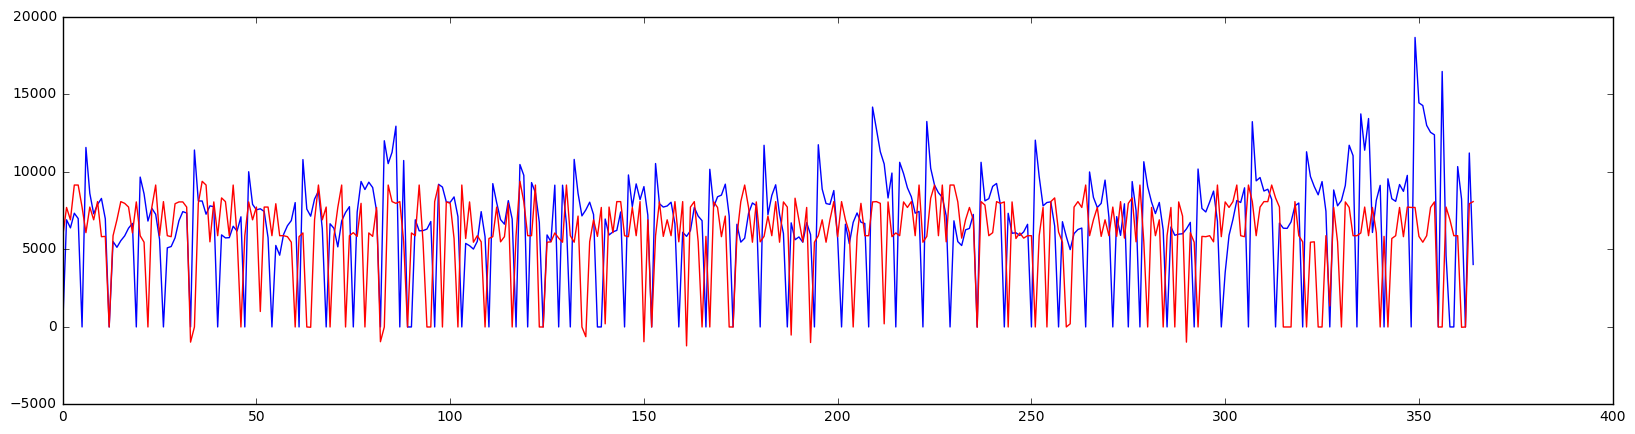

In [26]:
plt.figure(figsize=(20, 5))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[:365].values, label="ground truth")
plt.plot(y_pred[:365], c='r', label="prediction")
plt.show()

In [22]:
from sklearn.externals import joblib

In [23]:
joblib.dump(regressor, 'regressor')

['regressor', 'regressor_01.npy', 'regressor_02.npy']

In [24]:
clf = joblib.load('models/regressor')

FileNotFoundError: [Errno 2] No such file or directory: 'models/regressor'